## Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Dataset

In [3]:
df = pd.read_csv("perceptron_toydata-truncated.txt", sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [9]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [10]:
print(X_train.shape)
print(y_train.shape)

(20, 2)
(20,)


## Plotting Datapoints

In [12]:
%matplotlib inline

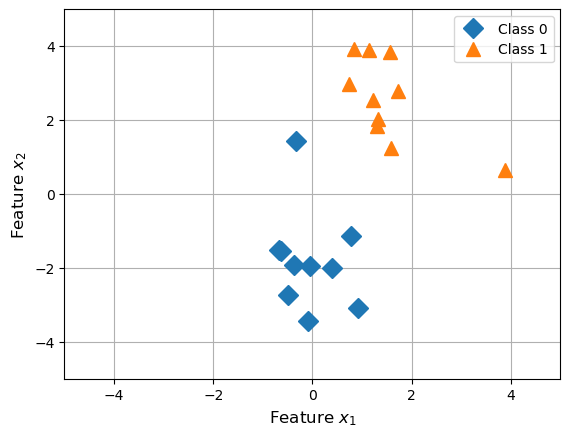

In [19]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=10,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=1)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

## Implementing Perceptron

In [57]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(self.num_features)]
        self.bias = 0.0
        

    def forward(self, x):
        weighted_sum_z = self.bias

        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0

        return prediction
        

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += x[i] * error

        return error

    def __repr__(self):
        return f'''The Perceptron:
        Weights: {self.weights}
        Bias: {self.bias}'''

In [58]:
def train(model, all_x, all_y, epochs):
    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)

        print(f"The error in epoch {epoch + 1} is {error_count}")

In [59]:
ppn = Perceptron(2)

In [60]:
train(ppn, X_train, y_train, 5)

The error in epoch 1 is 1
The error in epoch 2 is 3
The error in epoch 3 is 1
The error in epoch 4 is 0
The error in epoch 5 is 0


In [61]:
ppn

The Perceptron:
        Weights: [2.86, 1.98]
        Bias: -3.0

## Evaluating Results

In [67]:
def calculate_accuracy(model, all_x, all_y):
    correct = 0

    for x, y in zip(all_x, all_y):
        correct += int(model.forward(x) == y)

    return correct/len(all_y)

In [68]:
calculate_accuracy(ppn, X_train, y_train)

1.0